In [2]:
install.packages("vegan")
library("vegan")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: permute

Loading required package: lattice



In [2]:
data(varechem,varespec)
mycca1 = cca(varespec~ N + P + K, data = varechem)
mycca1


Call: cca(formula = varespec ~ N + P + K, data = varechem)

-- Model Summary --

              Inertia Proportion Rank
Total          2.0832     1.0000     
Constrained    0.4464     0.2143    3
Unconstrained  1.6368     0.7857   20

Inertia is scaled Chi-square

-- Eigenvalues --

Eigenvalues for constrained axes:
   CCA1    CCA2    CCA3 
0.19309 0.16271 0.09060 

Eigenvalues for unconstrained axes:
   CA1    CA2    CA3    CA4    CA5    CA6    CA7    CA8 
0.4495 0.2870 0.1877 0.1675 0.1280 0.1050 0.0750 0.0629 
(Showing 8 of 20 unconstrained eigenvalues)


In [ ]:
#21 unconstrained = variance


In [3]:
ev =  eigenvals(mycca1, model = "constrained")
head(ev)

CCA1       CCA2       CCA3 
0.19308594 0.16271109 0.09060228

In [4]:
length(ev)

[1] 3

In [ ]:
#extract site scores axes 2&3 with hill's scaling, focus on sites

In [5]:
str(scores(mycca1, choices = 2:3, display = c("sites")), hill = TRUE, max = 1)

 num [1:24, 1:2] -0.488 1.215 0.643 1.811 0.137 ...
 - attr(*, "dimnames")=List of 2


In [6]:
str(scores(mycca1, choices = 2:3, display = c("sites")), scaling = "sites", hill = TRUE, max = 1)

 num [1:24, 1:2] -0.488 1.215 0.643 1.811 0.137 ...
 - attr(*, "dimnames")=List of 2


In [7]:
scrs = scores(mycca1, display = "sites", choices = c(2,3),
               scaling = "sites", hill = TRUE)
scrs

,CCA2,CCA3
18,-0.21507383,0.22617222
15,0.53564592,0.14736699
24,0.28328352,0.56306912
27,0.79825273,0.35205393
23,0.06029273,0.09438971
19,-0.04742753,-0.09586591
22,0.77637058,-0.21842417
16,0.64172291,-0.12439794
28,1.36590227,0.72590870
13,0.97285422,-0.71702255


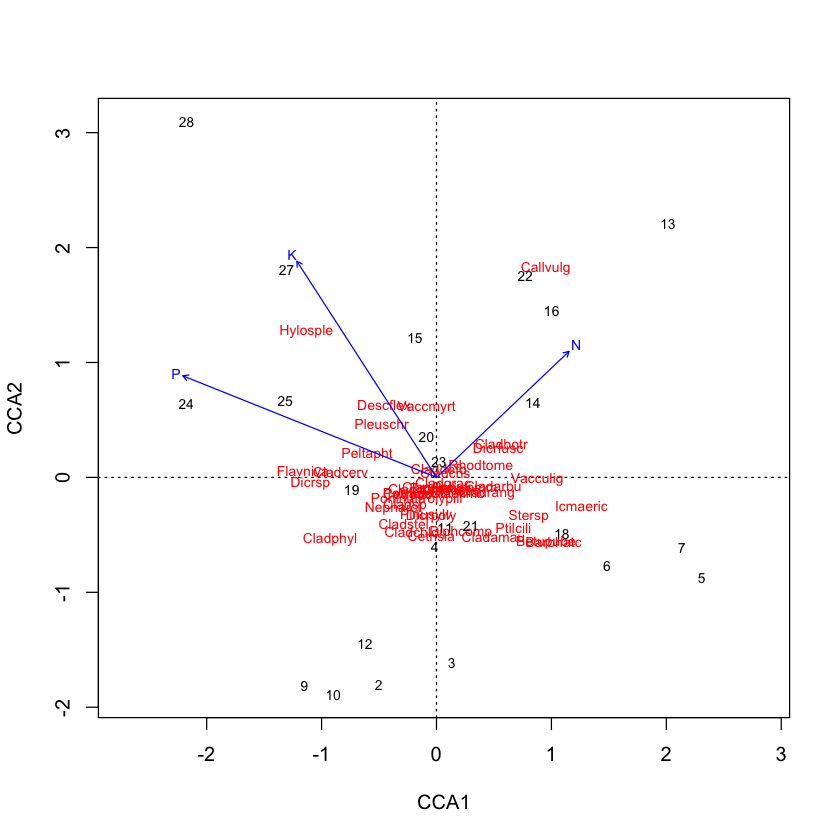

In [8]:
plot(mycca1)

In [1]:
library(mgcv)

Loading required package: nlme

This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.



In [3]:
url_env <- "https://bit.ly/pondsenv"
env <- read.csv(url(url_env))

url_diat <- "https://bit.ly/pondsdiat"
diat <- read.csv(url(url_diat))

In [4]:
rownames(diat)
names(diat)
names(env)

[1] "X004" "X007" "X031" "X034" "X037" "X042" "X050" "X053" "X057" "X058"
[11] "X065" "X069" "X073" "X074" "X076" "X079" "X082" "X083" "X085" "X086"
[21] "X098" "X100" "X101" "X105" "X107" "X108" "X112" "X113" "X114" "X120"

[1] "AC001A" "AC013A" "AC013E" "AM011A" "AM012A" "AS001A" "AU002A" "AU003B"
 [9] "CC001A" "CC002A" "CC9997" "CM004A" "CO001A" "CY002A" "CY003A" "CY009A"
[17] "CY011A" "FR001A" "FR002A" "FR002C" "FR006A" "FR006E" "FR009B" "FR018A"
[25] "FR019A" "GO013A" "NA004A" "NA007A" "NA022A" "NA042A" "NA114A" "NI009A"
[33] "NI014A" "NI015A" "NI083A" "NI196A" "NI9969" "NI9971" "OP001A" "ST001A"
[41] "ST002A" "ST010A" "SU016A" "SY002A" "SY003A" "SY003C" "SY010A" "UN9992"

[1] "pH"           "Conductivity" "Alkalinity"   "TP"           "SiO2"        
 [6] "NO3"          "Na"           "K"            "Mg"           "Ca"          
[11] "Cl"           "SO4"          "Chla"         "Secchid"      "Maxdepth"

In [5]:
names(diat)

[1] "AC001A" "AC013A" "AC013E" "AM011A" "AM012A" "AS001A" "AU002A" "AU003B"
 [9] "CC001A" "CC002A" "CC9997" "CM004A" "CO001A" "CY002A" "CY003A" "CY009A"
[17] "CY011A" "FR001A" "FR002A" "FR002C" "FR006A" "FR006E" "FR009B" "FR018A"
[25] "FR019A" "GO013A" "NA004A" "NA007A" "NA022A" "NA042A" "NA114A" "NI009A"
[33] "NI014A" "NI015A" "NI083A" "NI196A" "NI9969" "NI9971" "OP001A" "ST001A"
[41] "ST002A" "ST010A" "SU016A" "SY002A" "SY003A" "SY003C" "SY010A" "UN9992"

In [6]:
names(env)

[1] "pH"           "Conductivity" "Alkalinity"   "TP"           "SiO2"        
 [6] "NO3"          "Na"           "K"            "Mg"           "Ca"          
[11] "Cl"           "SO4"          "Chla"         "Secchid"      "Maxdepth"

In [7]:
ponds.cca <- cca(diat ~ ., data = env) #all variables
ponds.cca

Call: cca(formula = diat ~ pH + Conductivity + Alkalinity + TP + SiO2 + NO3
+ Na + K + Mg + Ca + Cl + SO4 + Chla + Secchid + Maxdepth, data = env)

-- Model Summary --

              Inertia Proportion Rank
Total          5.8123     1.0000     
Constrained    3.2729     0.5631   15
Unconstrained  2.5394     0.4369   14

Inertia is scaled Chi-square

-- Eigenvalues --

Eigenvalues for constrained axes:
  CCA1   CCA2   CCA3   CCA4   CCA5   CCA6   CCA7   CCA8   CCA9  CCA10  CCA11 
0.5947 0.4057 0.3380 0.3235 0.3027 0.2385 0.2063 0.1900 0.1513 0.1335 0.1262 
 CCA12  CCA13  CCA14  CCA15 
0.0997 0.0804 0.0527 0.0297 

Eigenvalues for unconstrained axes:
   CA1    CA2    CA3    CA4    CA5    CA6    CA7    CA8    CA9   CA10   CA11 
0.4449 0.3158 0.2868 0.2464 0.2391 0.2046 0.1739 0.1492 0.1191 0.1029 0.0855 
  CA12   CA13   CA14 
0.0842 0.0518 0.0354 


In [ ]:
**What are the values of $\lambda_1$ and $\lambda_2$, the eigenvalues for constrained axes one and two?**

# 0.5947 and 0.4057 

**What is the total variance (inertia) in the diatom data?**
5.8123

**What proportion of the total variance is explained by the environmental variables?**
# 0.5631

**What proportion of the variance remains un-explained?** 
0.4369

In [21]:
wanted = c("wa","lc","species","bp","cn") 
scrs = scores(ponds.cca, display = wanted)
scrs |> str()
scrs$biplot

List of 4
 $ species    : num [1:48, 1:2] 0.59067 0.63518 1.71305 -0.00921 0.04963 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:48] "AC001A" "AC013A" "AC013E" "AM011A" ...
  .. ..$ : chr [1:2] "CCA1" "CCA2"
 $ sites      : num [1:30, 1:2] 0.573 -0.41 0.602 -1.11 0.829 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:30] "X004" "X007" "X031" "X034" ...
  .. ..$ : chr [1:2] "CCA1" "CCA2"
 $ constraints: num [1:30, 1:2] 0.355 0.0921 0.3307 -0.7654 0.9136 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:30] "X004" "X007" "X031" "X034" ...
  .. ..$ : chr [1:2] "CCA1" "CCA2"
 $ biplot     : num [1:15, 1:2] -0.0753 -0.0898 -0.1407 -0.6302 -0.3352 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:15] "pH" "Conductivity" "Alkalinity" "TP" ...
  .. ..$ : chr [1:2] "CCA1" "CCA2"


,CCA1,CCA2
pH,-0.07531172,0.29199623
Conductivity,-0.08979388,0.29455026
Alkalinity,-0.14070749,0.49247193
TP,-0.63023883,0.10420308
SiO2,-0.33522253,0.35837659
NO3,0.00236242,-0.10202867
Na,-0.22521013,-0.19339700
K,-0.26921124,0.05372973
Mg,0.09168391,0.04807745
Ca,-0.01416731,0.33206736


In [ ]:
**Why are there two sets of site scores?**
#split them up into LC and WA?
#because of update in vegan summary() no longer gives wa and lc
**Look at the biplot scores in the summary output. Suggest which variables are important on CCA axes 1 and on CCA axis 2?**
# how can i infer this based on the scores alone, i see from the plot that Secchid is important 
#using the new code I can see that secchid is important as well as chla and TP because they have high values 

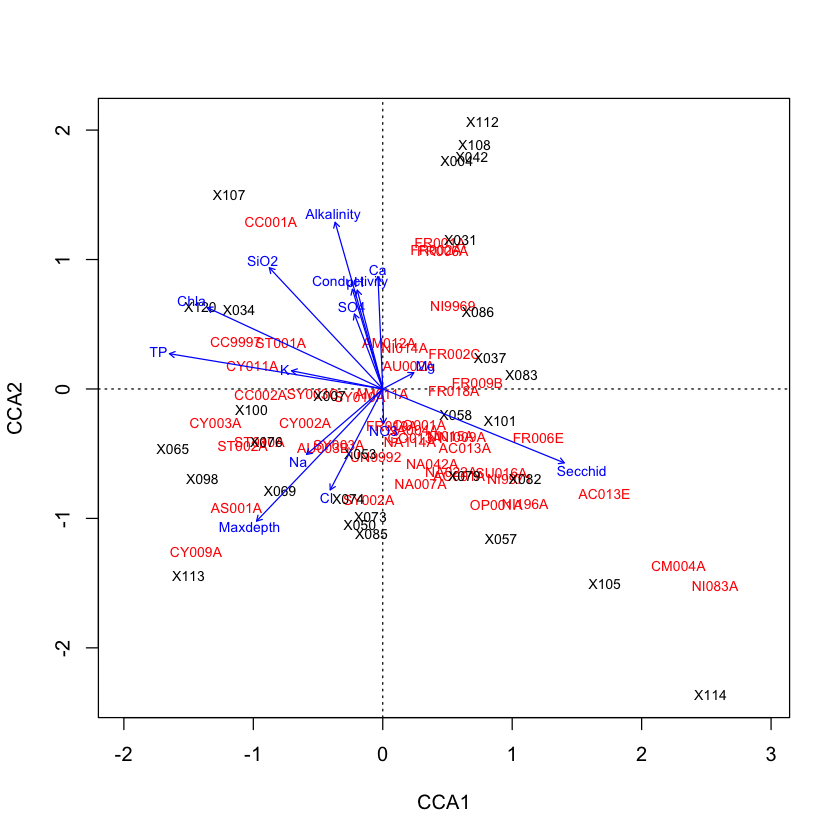

In [9]:
plot(ponds.cca)

In [ ]:
**Using the triplot, the biplot scores of the environmental variables and the ordination axes, interpret the axes in terms of environmental gradients.**
# <0 CCA one indicates turbid water, and secchi is on its own because it indicates clear water
**Indicate which species are characteristic of particular types of water.**
#the species on the left are characteristic of turbid water

In [10]:
#preform a CA
ponds.ca <- cca(diat)
ponds.ca

Call: cca(X = diat)

-- Model Summary --

              Inertia Rank
Total           5.812     
Unconstrained   5.812   29

Inertia is scaled Chi-square

-- Eigenvalues --

Eigenvalues for unconstrained axes:
   CA1    CA2    CA3    CA4    CA5    CA6    CA7    CA8 
0.6780 0.5733 0.4857 0.4019 0.3967 0.3862 0.3629 0.3124 
(Showing 8 of 29 unconstrained eigenvalues)


In [ ]:
**How does the result of the CCA compare to the results of the CA?**
#CA does not include constrained axes
**Plot the CA biplot and compare the configuration of sites in this biplot to the one shown in the CCA triplot. Does this suggest that our measured environmental variables explain the main floristic gradients in the diatom data?**
#yes, we captured some of the main pattern because the eigenvalues from just unconstrained are similar to the unconstrained axis from the original CCA

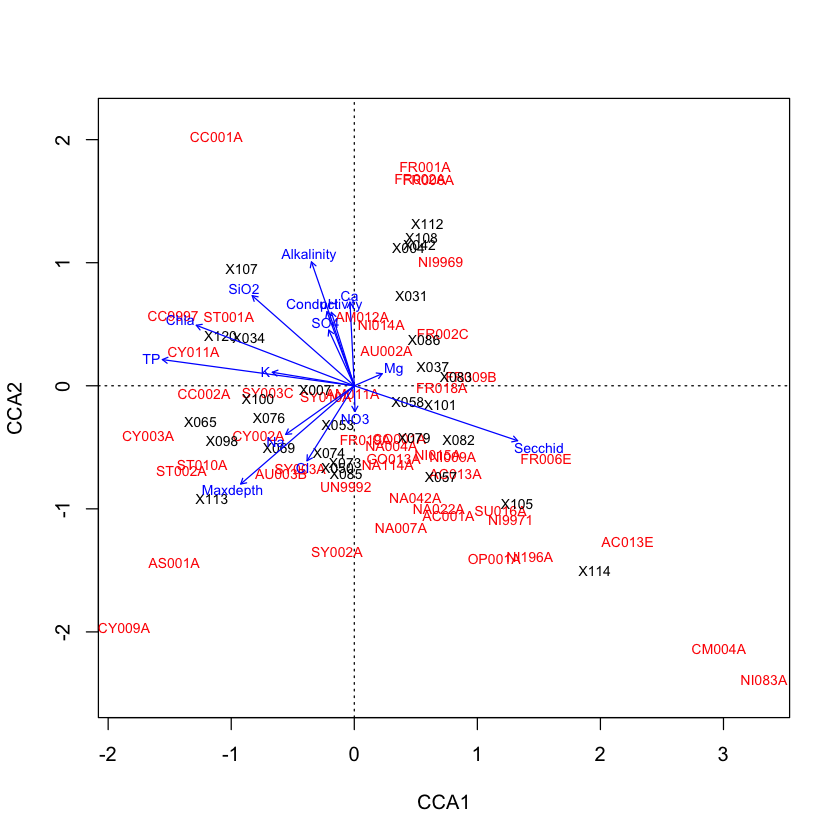

In [11]:
plot(ponds.cca, scaling = 1)
#the fact that these plots look similar despite Constrained CA including both constrained and unconstrained 
#shows that the measured environmental variables explain the main gradients 

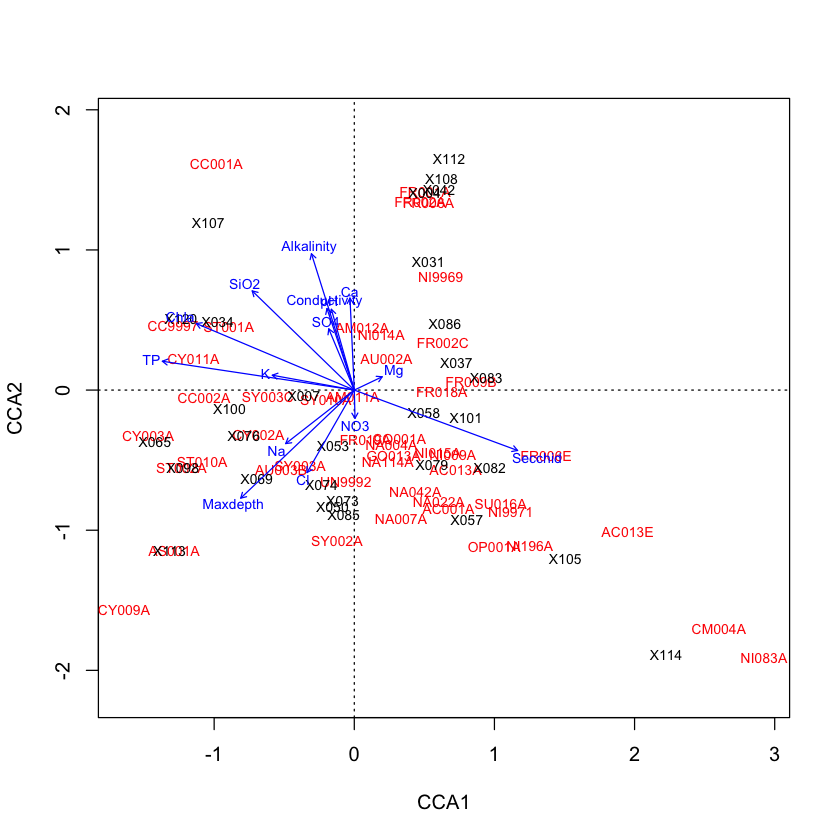

In [14]:
#how does scaling affect the plot
#the scaling does not seem to change the orientation of the ordination diagram, but does change how closely related the species are

#scaling shows the best representation the distances on what we chose to scale based on 
#species= represent coocurrance of the species 
plot(ponds.cca, scaling = 3)

In [15]:
#identifying outliers
diat.n2 <- renyi(t(diat), scales = 2, hill = TRUE)
ponds.n2 <- renyi(diat, scales = 2, hill = TRUE)

integer(0)

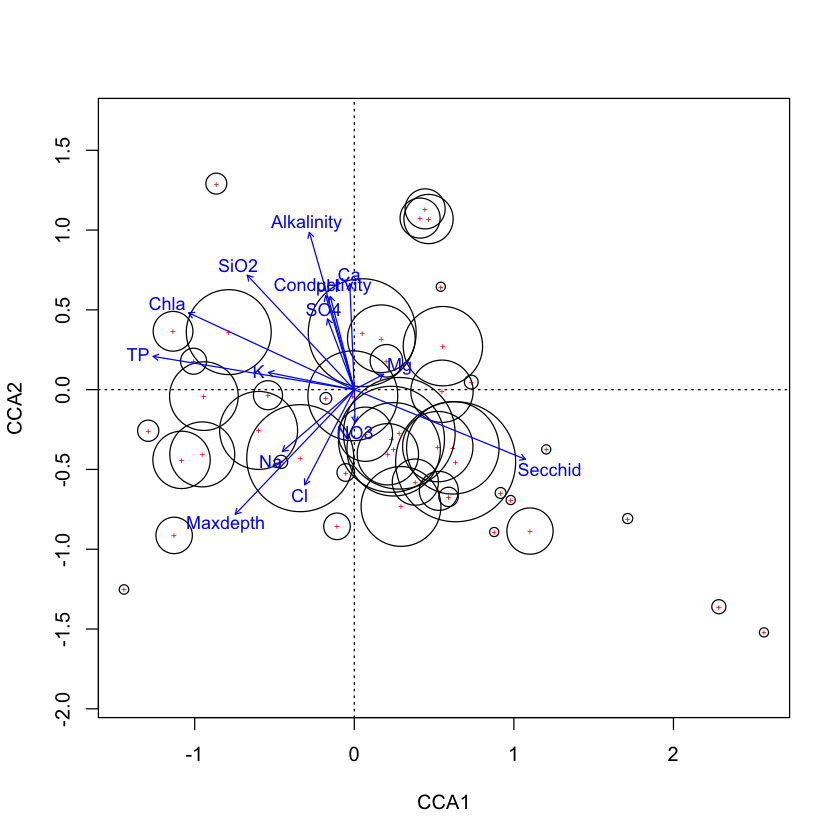

In [19]:
sppN2 <- plot(ponds.cca, display = "species", type = "n")
points(ponds.cca, display = "species", pch = "+", col = "red", cex = 0.5)
symbols(scores(ponds.cca)$species, circles = diat.n2,
        add = TRUE, inches = 0.5)
text(ponds.cca, display = "bp", arrow.mul = 2,
     col = "blue", cex = 0.9)
identify(sppN2, what = "species", ps = 10) #label the outlier species

integer(0)

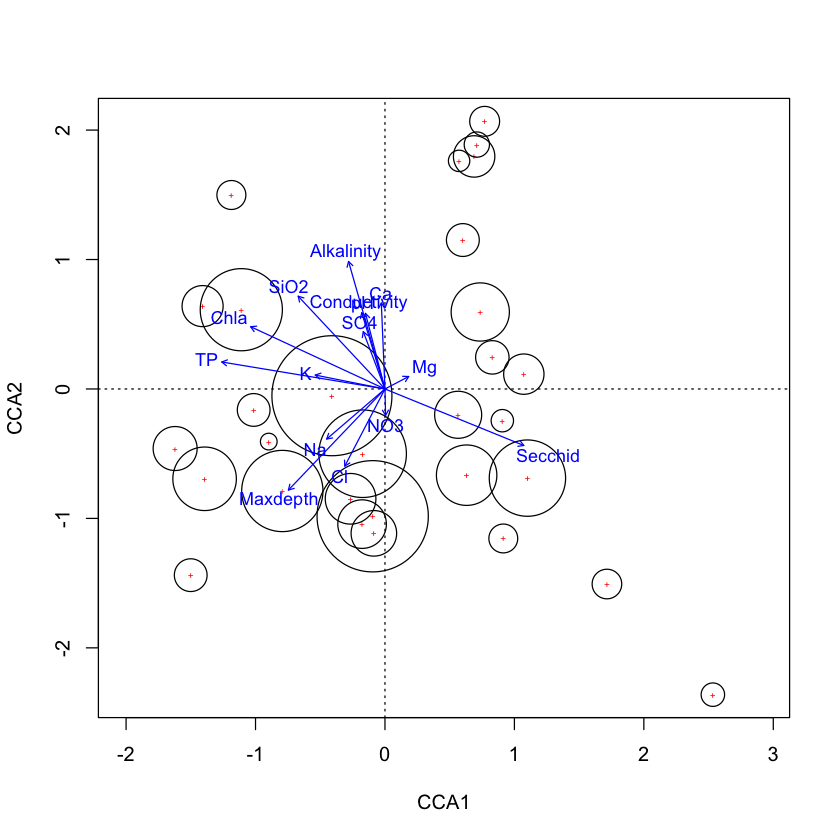

In [20]:
siteN2 <- plot(ponds.cca, display = "sites", type = "n")
points(ponds.cca, display = "sites", pch = "+", col = "red", cex = 0.5)
symbols(scores(ponds.cca)$sites, circles = ponds.n2,
        add = TRUE, inches = 0.5)
text(ponds.cca, display = "bp", arrow.mul = 2,
     col = "blue", cex = 0.9)
identify(siteN2, what = "sites", ps = 10) #label the outlier sites

In [18]:
#add the species/site labels to the species/site Hill's $N_2$ values and print them to the screen.
names(diat.n2) <- colnames(diat)
sort(diat.n2, decreasing = TRUE)
names(ponds.n2) <- rownames(diat)
sort(ponds.n2, decreasing = TRUE)

AC013A    CO001A    AM012A    SY003A    NA004A    GO013A    NI009A    AM011A 
13.086514 12.171578 11.760685 11.671420 11.565188 10.185667 10.081768  9.794931 
   ST001A    NA007A    FR002C    CY002A    NI015A    CC002A    NI014A    ST010A 
 9.259194  8.703289  8.654642  8.502914  7.676690  7.491457  7.379437  7.088374 
   FR018A    NA114A    ST002A    FR019A    FR006A    NI196A    NA042A    FR001A 
 6.798790  6.690709  6.257123  5.921108  5.370979  5.045259  5.035150  4.369158 
   FR002A    CC9997    NA022A    AS001A    AU002A    SY003C    SY002A    CY011A 
 4.368225  4.336735  4.258281  3.973356  3.550911  3.167832  2.900539  2.836805 
   CY003A    CC001A    AC001A    UN9992    CM004A    FR009B    AU003B    SY010A 
 2.317372  2.283760  2.111842  1.927968  1.540992  1.509753  1.449255  1.284486 
   SU016A    AC013E    CY009A    FR006E    NI083A    NI9969    NI9971    OP001A 
 1.182674  1.103362  1.028652  1.000000  1.000000  1.000000  1.000000  1.000000

X007      X073      X053      X034      X069      X082      X098      X079 
14.871546 13.788834 10.847350 10.179747 10.070123  9.462633  7.876966  7.493290 
     X086      X074      X050      X058      X085      X065      X042      X120 
 7.218861  6.278082  6.022174  5.829783  5.647034  5.453668  5.133319  5.090641 
     X083      X037      X031      X113      X100      X112      X105      X107 
 5.000622  4.144111  4.070488  4.059545  4.057343  3.704625  3.668637  3.588657 
     X057      X108      X114      X101      X004      X076 
 3.575210  3.132479  2.905178  2.771797  2.650494  2.073868

In [22]:

#**Using the Hill's $N_2$ plots and the actual $N_2$ values for the sites and species, which species are abundant and which are rare in the Ponds diatom data set?**
#rare OP001A, NI9971

#abundant CM004A AC013A, CO001A

#**Which of the sites have low species diversity and which high diversity?**
#low species richness X114 
#high diversity  X007 and X073


        #situations where CCA can get into trouble if some sites are outliers in composition if those species are abundant 

In [23]:
cor(env)

,pH,Conductivity,Alkalinity,TP,SiO2,NO3,Na,K,Mg,Ca,Cl,SO4,Chla,Secchid,Maxdepth
pH,1.00000000,0.24437444,0.66494965,0.21648830,0.16827018,-0.02539325,-0.222415901,0.11896865,-0.23074998,0.552880920,-0.24768071,0.17680843,0.23245787,0.21601655,0.15531390
Conductivity,0.24437444,1.00000000,0.70000239,-0.01018163,0.10118719,-0.05646803,0.652482667,0.70270765,0.75774183,0.612523177,0.62575735,0.78840801,0.16845267,-0.10451457,0.04102821
Alkalinity,0.66494965,0.70000239,1.00000000,0.26115328,0.43403762,0.08777021,0.092386006,0.39115610,0.27411486,0.728336138,0.03192457,0.45575424,0.37638252,0.04752526,-0.03032021
TP,0.21648830,-0.01018163,0.26115328,1.00000000,0.64730095,0.05125164,0.055901156,0.33445746,-0.18460736,0.069651573,-0.06049875,0.01262383,0.69828363,-0.21335318,-0.02114812
SiO2,0.16827018,0.10118719,0.43403762,0.64730095,1.00000000,0.41217592,-0.106400975,0.18177216,-0.10544559,0.101439136,-0.18337685,-0.08802556,0.55254266,-0.25319952,-0.20276961
NO3,-0.02539325,-0.05646803,0.08777021,0.05125164,0.41217592,1.00000000,-0.236301585,-0.33963147,-0.15361124,0.016198812,-0.26296525,-0.14684483,0.10046873,-0.10906881,-0.32771302
Na,-0.22241590,0.65248267,0.09238601,0.05590116,-0.10640097,-0.23630158,1.000000000,0.73942652,0.66787702,0.003619585,0.97046169,0.45522786,0.16896095,-0.29380903,0.08694370
K,0.11896865,0.70270765,0.39115610,0.33445746,0.18177216,-0.33963147,0.739426519,1.00000000,0.64237418,0.284447764,0.70895620,0.62157808,0.28055235,-0.18326963,0.05627566
Mg,-0.23074998,0.75774183,0.27411486,-0.18460736,-0.10544559,-0.15361124,0.667877017,0.64237418,1.00000000,0.214815702,0.64836108,0.79876234,0.01550717,-0.11442892,-0.03743950
Ca,0.55288092,0.61252318,0.72833614,0.06965157,0.10143914,0.01619881,0.003619585,0.28444776,0.21481570,1.000000000,0.01867224,0.56922274,0.12945958,0.20501580,-0.01246147


In [24]:
vif.cca(ponds.cca)

pH Conductivity   Alkalinity           TP         SiO2          NO3 
    7.238890    30.262396    16.344538    10.386463     5.018683     2.179886 
          Na            K           Mg           Ca           Cl          SO4 
   43.888206     8.870264    23.694856     6.633363    36.752869    18.663534 
        Chla      Secchid     Maxdepth 
    3.755310     2.165980     2.168597

In [ ]:
#Suggest which variables might be redundant and therefore dropped from the CCA model? 
#NO3 and Maxdepth might be redundant and dropped

In [25]:
#check the significance of the full CCA model we have fit using anova
set.seed(42)
anova(ponds.cca)

,Df,ChiSquare,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Model,15,3.272895,1.202927,0.027
Residual,14,2.539390,NA,NA


In [ ]:
#Is the full model significant at the 0.01 level?
#no it is above 0.01 level

In [26]:
spenvcor(ponds.cca)

CCA1      CCA2      CCA3      CCA4      CCA5      CCA6      CCA7      CCA8 
0.9714320 0.8873223 0.9368521 0.8922418 0.8995998 0.8931104 0.9118648 0.8689978 
     CCA9     CCA10     CCA11     CCA12     CCA13     CCA14     CCA15 
0.7703254 0.8615117 0.7335938 0.6773081 0.7731300 0.6087146 0.6062392

In [ ]:
#Are there high correlations between the two sets of site scores?
#yes

#What does this tell you about the relationships between the species and the environmental data?
#WHAT DOES THIS TELL ME


In [27]:
#To begin, define a null model to which we will sequentially add variables in order of added importance:

mod0 <- cca(diat ~ 1, data = env)
mod0

Call: cca(formula = diat ~ 1, data = env)

-- Model Summary --

              Inertia Rank
Total           5.812     
Unconstrained   5.812   29

Inertia is scaled Chi-square

-- Eigenvalues --

Eigenvalues for unconstrained axes:
   CA1    CA2    CA3    CA4    CA5    CA6    CA7    CA8 
0.6780 0.5733 0.4857 0.4019 0.3967 0.3862 0.3629 0.3124 
(Showing 8 of 29 unconstrained eigenvalues)


In [28]:
mod <- step(ponds.cca, scope = list(lower = formula(mod0),
                         upper = formula(ponds.cca)), test = "perm")

Start:  AIC=190.02
diat ~ pH + Conductivity + Alkalinity + TP + SiO2 + NO3 + Na + 
    K + Mg + Ca + Cl + SO4 + Chla + Secchid + Maxdepth

               Df    AIC      F Pr(>F)   
- Ca            1 189.40 0.6567  0.855   
- Conductivity  1 189.54 0.7262  0.850   
- Chla          1 189.72 0.8160  0.755   
- SiO2          1 189.81 0.8627  0.705   
- Alkalinity    1 189.97 0.9381  0.575   
<none>            190.02                 
- TP            1 190.12 1.0171  0.460   
- SO4           1 190.14 1.0236  0.430   
- Na            1 190.22 1.0641  0.375   
- Cl            1 190.41 1.1574  0.295   
- K             1 190.61 1.2637  0.165   
- NO3           1 190.71 1.3114  0.085 . 
- Mg            1 190.95 1.4351  0.060 . 
- pH            1 191.05 1.4880  0.040 * 
- Secchid       1 191.09 1.5053  0.060 . 
- Maxdepth      1 191.69 1.8226  0.010 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step:  AIC=189.4
diat ~ pH + Conductivity + Alkalinity + TP + SiO2 + NO3 + Na +

In [29]:
mod <- step(ponds.cca, scope = list(lower = formula(mod0),
                         upper = formula(ponds.cca)), test = "perm", trace = FALSE)

In [30]:
mod$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,14,5817.235,190.0215
- Ca,1,272.8854,15,6090.120,189.3968
- Conductivity,1,314.0583,16,6404.178,188.9053
- Chla,1,325.4941,17,6729.672,188.3925
- Alkalinity,1,447.3533,18,7177.026,188.3233
- Na,1,492.7214,19,7669.747,188.3152
- Cl,1,313.1228,20,7982.870,187.5157
- SO4,1,473.4869,21,8456.357,187.2443
- SiO2,1,420.0368,22,8876.393,186.6986


mod

In [31]:
anova(mod)

,Df,ChiSquare,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Model,2,0.749198,1.99763,0.001
Residual,27,5.063087,NA,NA


In [32]:
#**Is this model better than full model?**

#**How much of the total inertia is explained by the two constraints?

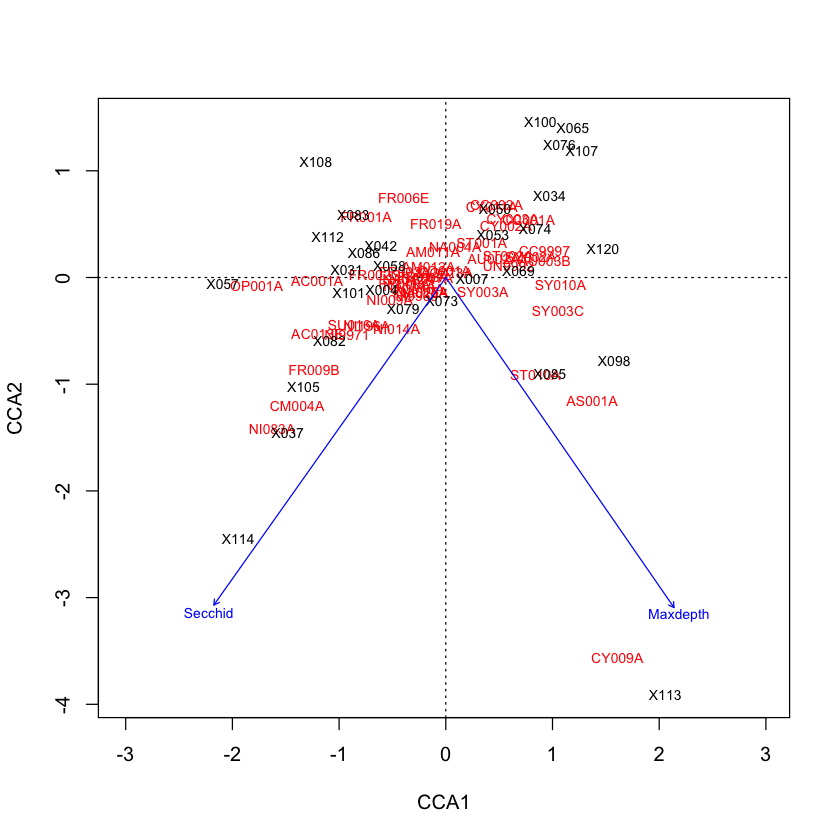

In [33]:
plot(mod) #strong outlier in maxdepth

In [34]:
#delete maxdepth observation in that pond
no.need <- which(rownames(diat) == "X113")
diat2 <- diat[-no.need, ]
env2 <- env[-no.need, ]
mod0 <- cca(diat2 ~ 1, data = env2)
cca.delete <- cca(diat2 ~ ., data = env2)

Start:  AIC=182.72
diat2 ~ pH + Conductivity + Alkalinity + TP + SiO2 + NO3 + Na + 
    K + Mg + Ca + Cl + SO4 + Chla + Secchid + Maxdepth

               Df    AIC      F Pr(>F)  
- Ca            1 182.16 0.6598  0.820  
- Conductivity  1 182.36 0.7532  0.825  
- SiO2          1 182.39 0.7677  0.815  
- Chla          1 182.50 0.8218  0.740  
<none>            182.72                
- Alkalinity    1 182.85 0.9896  0.465  
- Na            1 183.15 1.1340  0.245  
- TP            1 183.17 1.1454  0.230  
- Maxdepth      1 183.18 1.1467  0.230  
- Cl            1 183.24 1.1761  0.220  
- SO4           1 183.24 1.1792  0.235  
- K             1 183.31 1.2124  0.145  
- NO3           1 183.36 1.2381  0.195  
- pH            1 183.74 1.4235  0.035 *
- Secchid       1 183.97 1.5407  0.020 *
- Mg            1 184.04 1.5750  0.030 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step:  AIC=182.16
diat2 ~ pH + Conductivity + Alkalinity + TP + SiO2 + NO3 + Na + 
    K + Mg +

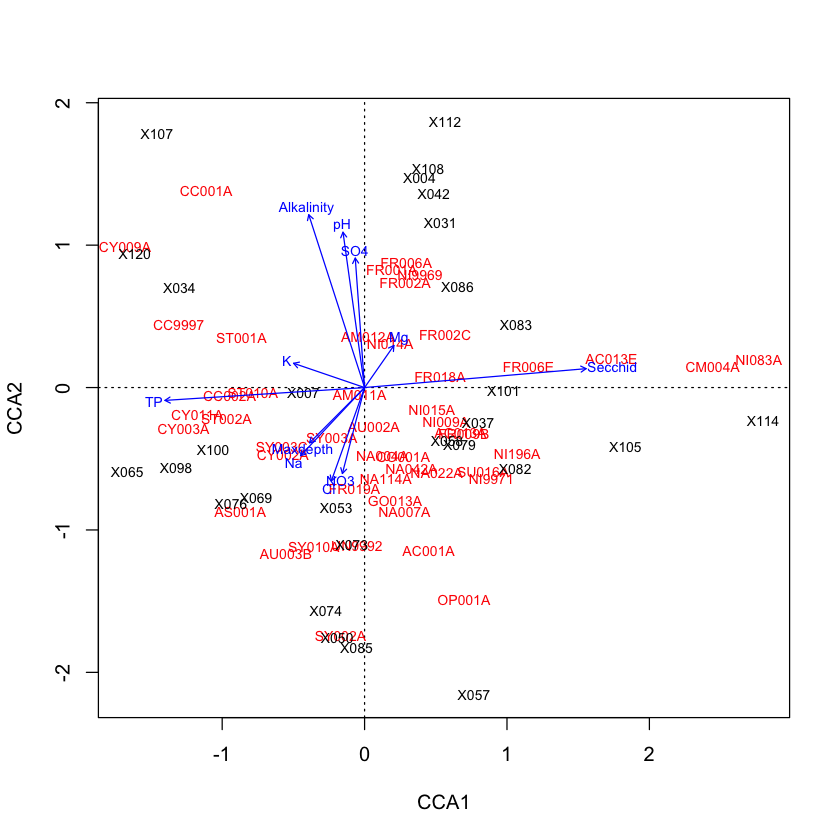

In [35]:
mod.delete <- step(cca.delete, scope = list(lower = formula(mod0),
                   upper = formula(cca.delete)), test = "perm")
plot(mod.delete)

Start:  AIC=177.41
diat2 ~ 1

               Df    AIC      F Pr(>F)   
+ Secchid       1 177.15 2.1815  0.005 **
<none>            177.41                 
+ TP            1 177.42 1.9137  0.005 **
+ Chla          1 177.56 1.7703  0.010 **
+ SiO2          1 177.90 1.4358  0.045 * 
+ Alkalinity    1 178.03 1.3165  0.095 . 
+ pH            1 178.14 1.2064  0.150   
+ NO3           1 178.15 1.1992  0.185   
+ Maxdepth      1 178.23 1.1145  0.280   
+ K             1 178.31 1.0407  0.430   
+ Ca            1 178.32 1.0273  0.425   
+ Cl            1 178.36 0.9918  0.425   
+ Na            1 178.37 0.9873  0.525   
+ Mg            1 178.40 0.9528  0.530   
+ Conductivity  1 178.41 0.9416  0.510   
+ SO4           1 178.57 0.7892  0.760   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step:  AIC=177.15
diat2 ~ Secchid

               Df    AIC      F Pr(>F)   
<none>            177.15                 
+ TP            1 177.40 1.6162  0.025 * 
- Secchid       1 177.41 2.

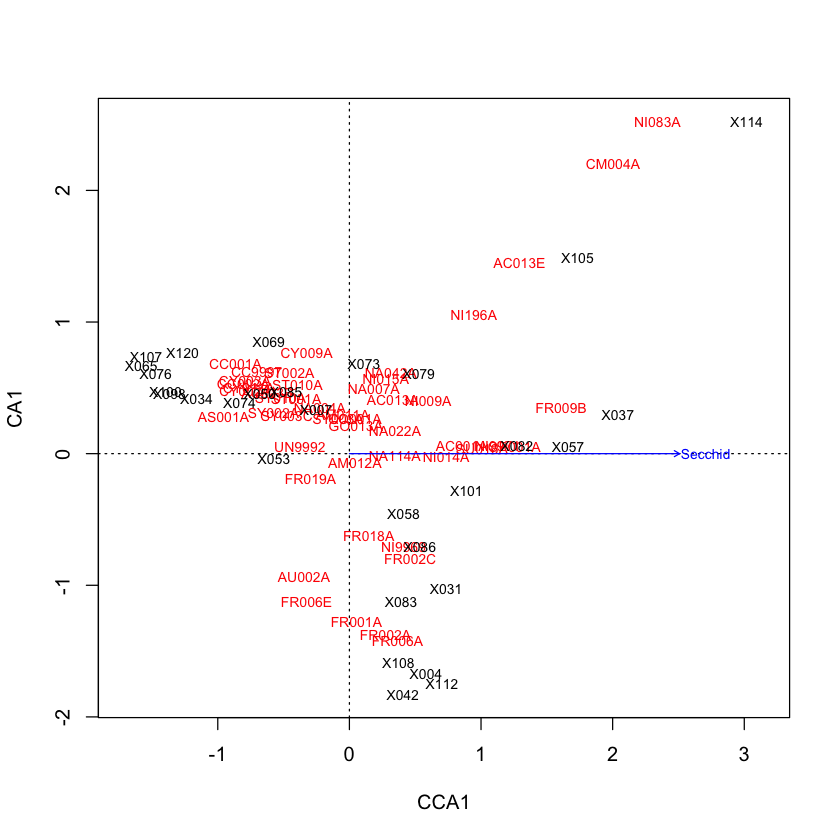

In [36]:
#this model excludes max depth and it also zooms in on a smaller sum of squares
mod.fwd<- step(mod0, scope = list(lower = formula(mod0),
                   upper = formula(cca.delete)), test = "perm")
plot(mod.fwd)

In [ ]:
#**Which variables has forward selection chosen?**
#forward selection has chosen secchi as the variable

In [37]:
# to start on which plot is better look at the significance of the terms in `mod.delete`:

anova(mod.delete, by = "margin")

,Df,ChiSquare,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
pH,1,0.2719433,1.556040,0.030
Alkalinity,1,0.2594965,1.484820,0.035
TP,1,0.2396505,1.371263,0.073
NO3,1,0.2215213,1.267529,0.149
Na,1,0.2234440,1.278530,0.108
K,1,0.2500957,1.431030,0.065
Mg,1,0.2809848,1.607775,0.020
Cl,1,0.2429229,1.389987,0.065
SO4,1,0.2367752,1.354811,0.111


In [38]:
#test using adjusted R^2
mod.r2step <- ordiR2step(mod0, scope = formula(cca.delete))
mod.r2step
mod.r2step$anova

Step: R2.adj= 0 
Call: diat2 ~ 1 
 
                  R2.adjusted
<All variables>  8.351640e-02
+ Secchid        4.081607e-02
+ TP             3.222314e-02
+ Chla           2.704542e-02
+ SiO2           1.517932e-02
+ Alkalinity     1.150547e-02
+ pH             7.799005e-03
+ NO3            7.379349e-03
+ Maxdepth       4.734841e-03
+ K              1.659067e-03
+ Ca             1.160441e-03
+ Cl             1.289455e-04
+ Na             4.497568e-05
<none>           0.000000e+00
+ Mg            -1.579497e-03
+ Conductivity  -1.725889e-03
+ SO4           -7.423730e-03

          Df    AIC      F Pr(>F)   
+ Secchid  1 177.15 2.1815  0.002 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step: R2.adj= 0.04097919 
Call: diat2 ~ Secchid 
 
                R2.adjusted
<All variables>  0.08351640
+ TP             0.06228952
+ Alkalinity     0.05498947
+ pH             0.05203994
+ SiO2           0.05170582
+ NO3            0.05049580
+ Maxdepth       0.04781569
+ Chla

Call: cca(formula = diat2 ~ Secchid + TP, data = env2)

-- Model Summary --

              Inertia Proportion Rank
Total          5.5819     1.0000     
Constrained    0.7195     0.1289    2
Unconstrained  4.8624     0.8711   26

Inertia is scaled Chi-square

-- Eigenvalues --

Eigenvalues for constrained axes:
  CCA1   CCA2 
0.5260 0.1935 

Eigenvalues for unconstrained axes:
   CA1    CA2    CA3    CA4    CA5    CA6    CA7    CA8 
0.6251 0.4756 0.4004 0.3943 0.3712 0.3148 0.2839 0.2763 
(Showing 8 of 26 unconstrained eigenvalues)


,R2.adj,Df,AIC,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
+ Secchid,0.04097919,1,177.1531,2.181542,0.002
+ TP,0.06231025,1,177.4043,1.616197,0.012
<All variables>,0.08351640,NA,NA,NA,NA


In [ ]:
#**Which terms have been retained in this model?**
#secchi and TP have been retained

#**Does this differ from the previous step-wise selection?**
#yes it differs from the mod.delete model because it includes TP


In [39]:
#Using `anova()` test the individual marginal effects of the terms retained in `mod.r2step`.
#Do all the terms have statistically significant marginal effects?

anova(mod.r2step)

,Df,ChiSquare,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Model,2,0.7195451,1.923763,0.001
Residual,26,4.8623892,NA,NA


In [ ]:
#yes all of the terms have statistically significant marginal effects

In [40]:
# investigating the effects of the hydrochemical variables on diatom distributions in the Ponds dataset, 
#after controlling for the effects of `Maxdepth` and `Secchid`, we would fit this model in **R** like so:

partial.mod <- cca(diat ~ . + Condition(Maxdepth + Secchid), data = env)
partial.mod
anova(partial.mod)


Some constraints or conditions were aliased because they were redundant. This
can happen if terms are linearly dependent (collinear): ‘Secchid’, ‘Maxdepth’



Call: cca(formula = diat ~ pH + Conductivity + Alkalinity + TP + SiO2 + NO3
+ Na + K + Mg + Ca + Cl + SO4 + Chla + Secchid + Maxdepth +
Condition(Maxdepth + Secchid), data = env)

-- Model Summary --

              Inertia Proportion Rank
Total          5.8123     1.0000     
Conditional    0.7492     0.1289    2
Constrained    2.5237     0.4342   13
Unconstrained  2.5394     0.4369   14

Inertia is scaled Chi-square

-- Note --

Some constraints or conditions were aliased because they were redundant.
This can happen if terms are linearly dependent (collinear): ‘Secchid’,
‘Maxdepth’

-- Eigenvalues --

Eigenvalues for constrained axes:
  CCA1   CCA2   CCA3   CCA4   CCA5   CCA6   CCA7   CCA8   CCA9  CCA10  CCA11 
0.3974 0.3689 0.3278 0.2767 0.2063 0.2052 0.1630 0.1508 0.1463 0.1053 0.0804 
 CCA12  CCA13 
0.0536 0.0419 

Eigenvalues for unconstrained axes:
   CA1    CA2    CA3    CA4    CA5    CA6    CA7    CA8    CA9   CA10   CA11 
0.4449 0.3158 0.2868 0.2464 0.2391 0.2046 0.1739 0.1492

,Df,ChiSquare,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Model,13,2.523697,1.070268,0.986
Residual,14,2.539390,NA,NA


In [ ]:
#**Do the remaining environmental variables explain significant amounts of the variance in the species data after controlling for `Maxdepth` and `Secchid`?**
#the remaining variables do explain 

#**How much of the variance is explained by the Conditional variables?**
#0.1289 proportional to the inertia

#**How much of the variance is explained by the constraints?**
#0.4342 of the interia is explained by the constraints

#**How much is left unexplained?**
